In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [3]:
tmp = pd.read_html('https://uk.m.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C',  match= 'Коефіцієнт народжуваності в регіонах')

In [4]:
tmp = copy(tmp[0])

In [5]:
tmp.shape
print(tmp.head(3))
tmp.replace('—', np.nan, inplace = True)
print(tmp)
print(tmp.dtypes)
tmp = tmp.astype({'2014': np.float64})
tmp = tmp.astype({'2019': np.float64})
print(tmp.dtypes)

      Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0       Крим  230.0  206.0  160.0   130    73   126    —    —
1  Вінницька  224.0  192.0  142.0   124    84   112  109   76
2  Волинська  247.0  250.0  179.0   153   112   148  141  101
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0

In [6]:
tmp.loc[1:5, '1950']

1    224.0
2    247.0
3    204.0
4    271.0
5    261.0
Name: 1950, dtype: float64

In [7]:
for i in tmp:
    if i == 'Регіон':
        continue
    else:
        tmp.fillna({i :tmp[i].mean()}, inplace= True)

In [8]:
print(tmp[tmp['2019'] > tmp['2019'].mean()])
print(tmp[tmp['2014'] == tmp['2014'].max()])

               Регіон        1950   1960   1970  1990  2000  2012   2014   2019
2           Волинська  247.000000  250.0  179.0   153   112   148  141.0  101.0
6        Закарпатська  314.000000  273.0  207.0   168   115   151  146.0  104.0
8   Івано-Франківська  243.000000  248.0  182.0   155   103   124  122.0   88.0
12          Львівська  234.000000  240.0  171.0   140    91   119  119.0   87.0
14            Одеська  241.000000  192.0  148.0   126    80   127  123.0   88.0
16         Рівненська  269.000000  267.0  193.0   158   118   159  148.0  107.0
20         Херсонська  208.000000  214.0  166.0   143    85   117  115.0   81.0
23        Чернівецька  247.000000  218.0  170.0   148   101   128  129.0   92.0
25               Київ  230.923077  174.0  159.0   120    73   120  121.0  110.0
27            Україна  228.000000  205.0  152.0   126    78   114  111.0   81.0
        Регіон   1950   1960   1970  1990  2000  2012   2014   2019
16  Рівненська  269.0  267.0  193.0   158   118   15

Text(0.5, 1.0, 'Коэффициент рождаемости')

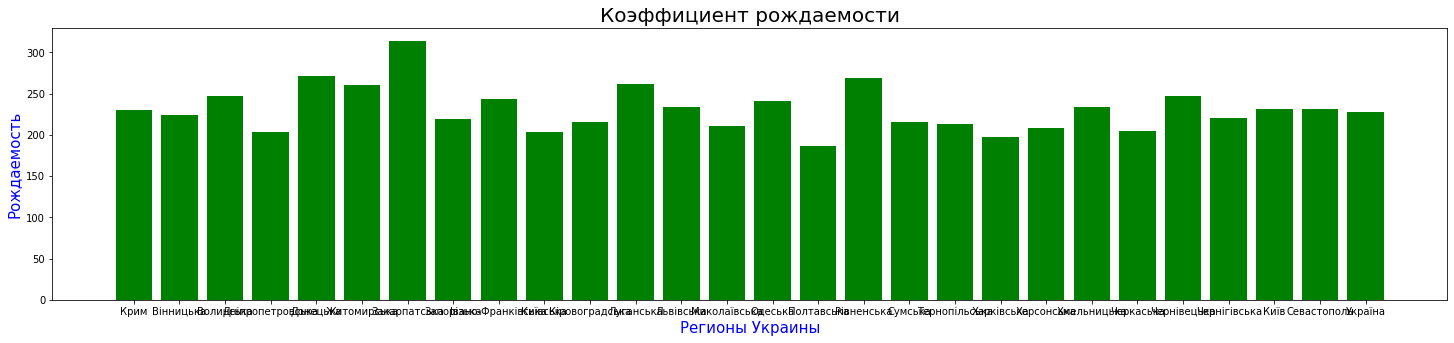

In [30]:
plt.figure(figsize=(25, 5))
plt.bar(tmp['Регіон'], tmp['1950'], color = 'g' )
plt.xlabel('Регионы Украины', fontsize = 15, color = 'b')
plt.ylabel('Рождаемость', fontsize = 15, color = 'b')
plt.title('Коэффициент рождаемости', fontsize = 20)

1950    230
1960    206
1970    160
1990    130
2000     73
Name: 0, dtype: object

Text(0.5, 1.0, 'Рождаемость в Одесской и Тернопольской областях')

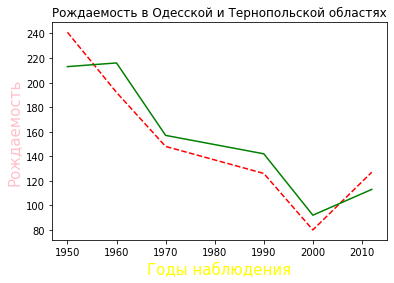

In [50]:
years = [1950,1960, 1970, 1990, 2000, 2012]
plt.plot(years, tmp.loc[14, '1950':'2012'], '--r', years, tmp.loc[18, '1950':'2012'], 'g')
plt.xlabel('Годы наблюдения', fontsize = 15, color = 'yellow')
plt.ylabel('Рождаемость', fontsize = 15, color = 'pink')
plt.title('Рождаемость в Одесской и Тернопольской областях')

([<matplotlib.patches.Wedge at 0x7f4eb76571d0>,
 [Text(1.3403815075817527, 0.4041997205996901, 'Вінницька'),
  Text(0.7856426790738941, 1.158777623540252, 'Волинська'),
  Text(-0.09378402801253027, 1.396855238057883, 'Дніпропетровська'),
  Text(-0.8167381618370677, 1.0749133802307085, 'Донецька'),
  Text(-1.2866776729299336, 0.40860808360042356, 'Житомирська'),
  Text(-1.2446188999793424, -0.5228994107992585, 'Закарпатська'),
  Text(-0.6104592971276583, -1.0907976194282811, 'Запорізька'),
  Text(0.1135481265304562, -1.2448320460855045, 'Івано-Франківська'),
  Text(0.8413730790312597, -0.924441097031854, 'Київська'),
  Text(1.2073249192825422, -0.3238310350775585, 'Кіровоградська')],
 [Text(1.1967692031979935, 0.3608926076782948, '9.32%'),
  Text(0.7014666777445483, 1.0346228781609392, '12.39%'),
  Text(-0.08373573929690203, 1.2471921768373957, '8.71%'),
  Text(-0.7259894771885047, 0.9554785602050743, '9.84%'),
  Text(-1.14371348704883, 0.3632071854225987, '9.69%'),
  Text(-1.1063279110

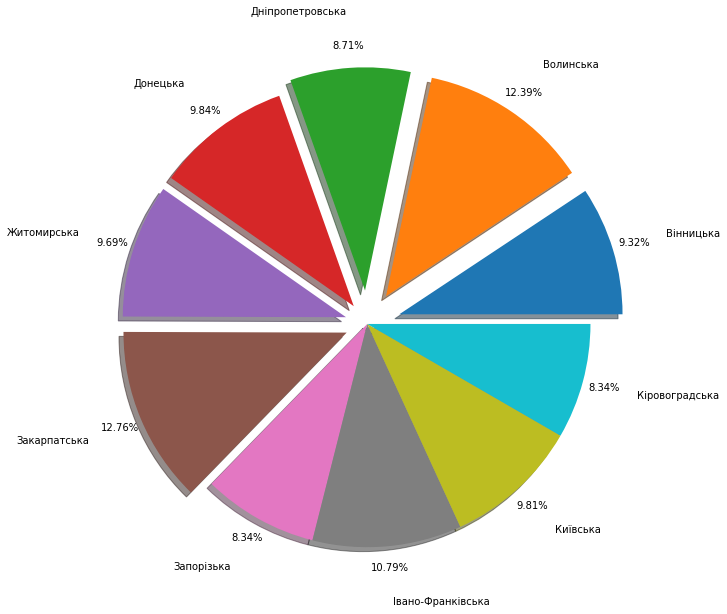

In [22]:
plt.figure(figsize=(10,15))
data = tmp.loc[1:10,'2019']
labels = tmp.loc[1:10,'Регіон']
explode = [0.15, 0.15, 0.15, 0.1, 0.1, 0.1, 0, 0, 0, 0]
plt.pie(
    data,
    labels=labels,
    explode = explode,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.1,
    labeldistance=1.25,
)
